In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [3]:
data['target'] = pd.DataFrame(data = iris.target)   
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
X = data.drop('target', axis=1)
y = data[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=3)

model = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_leaf=10, max_leaf_nodes=3)   
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
print('accuracy=', metrics.accuracy_score(y_test, y_predict))

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

print('mse train=', mean_squared_error(y_train, pred_train))
print('mse train=', mean_squared_error(y_test, pred_test))

accuracy= 0.9333333333333333
mse train= 0.0380952380952381
mse train= 0.06666666666666667


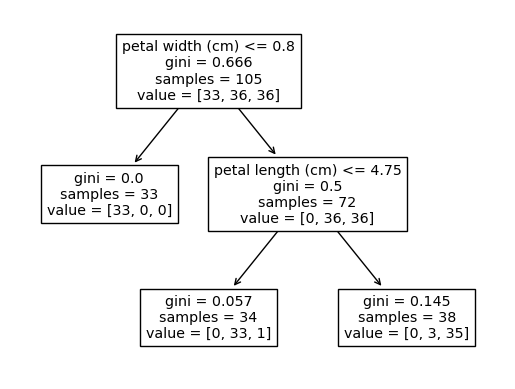

In [5]:
fig = plt.figure()
_ = tree.plot_tree(model, feature_names=iris.feature_names)

In [6]:
# пошук best parameters з GridSearchCV

params = {'max_depth': range(2, 5), 
         'min_samples_leaf': range(5, 30), 
         'max_leaf_nodes': range(2, 5)
        }

reg = GridSearchCV(DecisionTreeClassifier(), param_grid = params)  

reg.fit(X_train, y_train)

tree_model = reg.best_estimator_
print(reg.best_score_, reg.best_params_)

0.9238095238095237 {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_leaf': 27}


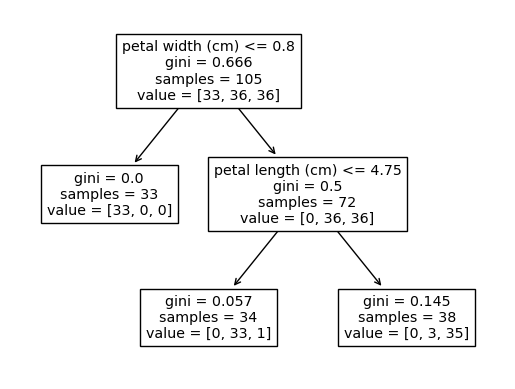

In [7]:
fig = plt.figure()
_ = tree.plot_tree(tree_model, feature_names=iris.feature_names)